**After running:**

- `$ python preprocess_drugbank.py` to preprocess the DrugBank dataset and generate `small_molecules.json`

- `$ python disease_extraction.py` to extract the associated diseases for each small molecule and create `drug_diseases.json`

In [1]:
import json
import pandas as pd

with open('drug_disease.json', 'r') as f:
    drug_disease = json.load(f)

with open('small_molecules.json', 'r') as f:
    small_molecules = json.load(f)

small_molecules_df = pd.DataFrame(small_molecules.values(), index=small_molecules.keys())
drug_disease_df = pd.DataFrame(drug_disease.values(), index=drug_disease.keys())

print(small_molecules_df.shape, drug_disease_df.shape)

# Merge dataframes on index
merged_df = small_molecules_df.merge(
    drug_disease_df,
    left_index=True,
    right_index=True,
    how='left'
).rename(columns={0: 'disease'})

print(merged_df.shape)

merged_df.sample(5)

(2442, 11) (2442, 1)
(2442, 12)


,drugbank-id,name,description,toxicity,protein-binding,indication,enzymes,targets,SMILES,Molecular Formula,InChI,disease
Suramin,DB04786,Suramin,A polyanionic compound with an unknown mechani...,None,Approximately 99.7%,"For treatment of human sleeping sickness, onch...","[\n , Arylsulfatase A, Cytosolic phospholip...","[{'name': 'P2Y purinoceptor 2', 'organism': 'H...",CC1=C(NC(=O)C2=CC(NC(=O)NC3=CC=CC(=C3)C(=O)NC3...,C51H40N6O23S6,InChI=1S/C51H40N6O23S6/c1-25-9-11-29(49(60)54-...,Other
Norgestimate,DB00957,Norgestimate,Norgestimate was first described in the litera...,Data regarding overdoses of norgestimate are r...,17-desacetylnorgestimate is 97.2% bound to alb...,Norgestimate is formulated with [ethinylestrad...,"[\n , Cytochrome P450 3A4, Cytochrome P450 ...","[{'name': 'Progesterone receptor', 'organism':...",[H][C@@]12CC[C@@](OC(C)=O)(C#C)[C@@]1(CC)CC[C@...,C23H31NO3,InChI=1S/C23H31NO3/c1-4-22-12-10-19-18-9-7-17(...,Other
Nifurtimox,DB11820,Nifurtimox,"Chagas disease, caused by a parasite known as ...",There is limited information in the literature...,The plasma protein binding of nifurtimox is ap...,Nifurtimox is indicated in pediatric patients ...,"[\n , Nitroreductases]","[{'name': 'Nitroreductases', 'organism': 'Tryp...",CC1CS(=O)(=O)CCN1\N=C\C1=CC=C(O1)[N+]([O-])=O,C10H13N3O5S,"InChI=1S/C10H13N3O5S/c1-8-7-19(16,17)5-4-12(8)...",Other
C31G,DB05398,C31G,C31G is a potent broad spectrum antimicrobial ...,None,None,Investigated for use/treatment in contraceptio...,[],"[{'name': 'Gag-Pol polyprotein', 'organism': N...",CCCCCCCCCCCC[N+](C)(C)[O-].CCCCCCCCCCCC[N+](C)...,C30H64N2O3,InChI=1S/C16H33NO2.C14H31NO/c1-4-5-6-7-8-9-10-...,Other
Tocainide,DB01056,Tocainide,An antiarrhythmic agent which exerts a potenti...,The oral LD<sub>50</sub> of tocainide was calc...,Approximately 10 percent bound to plasma protein.,For the treatment of documented ventricular ar...,"[\n , Cytochrome P450 1A2]",[{'name': 'Sodium channel protein type 5 subun...,CC(N)C(=O)NC1=C(C)C=CC=C1C,C11H16N2O,InChI=1S/C11H16N2O/c1-7-5-4-6-8(2)10(7)13-11(1...,Other


In [2]:
diseases = ["Alzheimer's", "Schizophrenia", "Parkinson"]

merged_df_diseases = merged_df[merged_df["disease"].isin(diseases)].copy()
merged_df_diseases.shape

merged_df_diseases["target_names"] = merged_df_diseases["targets"].apply(
    lambda x: [target["name"] for target in x if target["known-action"] == "yes"]
)

merged_df_diseases.sample(5)

,drugbank-id,name,description,toxicity,protein-binding,indication,enzymes,targets,SMILES,Molecular Formula,InChI,disease,target_names
Neramexane,DB04926,Neramexane,Neramexane is a low-to-moderate affinity uncom...,None,None,Investigated for use/treatment in alzheimer's ...,[],"[{'name': 'Glutamate receptor ionotropic, NMDA...",CC1(C)CC(C)(C)CC(C)(N)C1,C11H23N,"InChI=1S/C11H23N/c1-9(2)6-10(3,4)8-11(5,12)7-9...",Alzheimer's,[]
Biperiden,DB00810,Biperiden,A muscarinic antagonist that has effects in bo...,LD<sub>50</sub>=760 mg/kg (Orally in rats). Si...,60%,For use as an adjunct in the therapy of all fo...,"[\n , Cytochrome P450 2D6]",[{'name': 'Muscarinic acetylcholine receptor M...,OC(CCN1CCCCC1)(C1CC2CC1C=C2)C1=CC=CC=C1,C21H29NO,"InChI=1S/C21H29NO/c23-21(19-7-3-1-4-8-19,11-14...",Parkinson,[Muscarinic acetylcholine receptor M1]
Perospirone,DB08922,Perospirone,Perospirone is an atypical or second-generatio...,Frequently experienced adverse effects include...,Plasma protein binding ratio is 92% with exten...,For the treatment of schizophrenia and acute c...,"[\n , Cytochrome P450 3A4, Cytochrome P450 ...","[{'name': '5-hydroxytryptamine receptor 2A', '...",[H][C@@]12CCCC[C@]1([H])C(=O)N(CCCCN1CCN(CC1)C...,C23H30N4O2S,InChI=1S/C23H30N4O2S/c28-22-17-7-1-2-8-18(17)2...,Schizophrenia,"[5-hydroxytryptamine receptor 2A, Dopamine D2 ..."
Risperidone,DB00734,Risperidone,Risperidone is a second-generation antipsychot...,"Symptoms of overdose include lethargy, dystoni...","Risperidone and its active metabolite, 9-hydro...",Risperidone is indicated for the treatment of ...,"[\n , Cytochrome P450 2D6, Cytochrome P450 ...","[{'name': '5-hydroxytryptamine receptor 2A', '...",CC1=C(CCN2CCC(CC2)C2=NOC3=C2C=CC(F)=C3)C(=O)N2...,C23H27FN4O2,InChI=1S/C23H27FN4O2/c1-15-18(23(29)28-10-3-2-...,Schizophrenia,"[5-hydroxytryptamine receptor 2A, Dopamine D2 ..."
Propentofylline,DB06479,Propentofylline,None,None,None,Investigated for use/treatment in alzheimer's ...,"[\n , Cytochrome P450 1A2]","[{'name': 'cAMP-specific 3',5'-cyclic phosphod...",CCCN1C=NC2=C1C(=O)N(CCCCC(C)=O)C(=O)N2C,C15H22N4O3,InChI=1S/C15H22N4O3/c1-4-8-18-10-16-13-12(18)1...,Alzheimer's,[]


In [3]:
# the targets columns contain the list of targets for each drug
# for each disease, compute the co-occurence matrix of targets
from itertools import combinations

disease_matrices = dict()

for disease in diseases:
    disease_df = merged_df_diseases.loc[
        merged_df_diseases["disease"] == disease,
        ["disease", "target_names"]
    ]

    unique_targets = set()
    unique_targets.update(disease_df['target_names'].explode().dropna().unique())
    unique_targets = list(unique_targets)

    co_occurrence_matrix = pd.DataFrame(index=unique_targets, columns=unique_targets).fillna(0)

    for targets in disease_df['target_names']:
        for target1, traget2 in combinations(targets, 2):
            co_occurrence_matrix.at[target1, traget2] += 1
            co_occurrence_matrix.at[traget2, target1] += 1

    disease_matrices[disease] = co_occurrence_matrix

disease_matrices["Alzheimer's"]

,Glutamate (NMDA) receptor,Neuronal acetylcholine receptor subunit alpha-7,Glycogen synthase kinase-3 beta,Cholinesterase,Acetylcholinesterase,Microtubule-associated protein tau,Amyloid beta A4 protein
Glutamate (NMDA) receptor,0,0,0,0,0,0,0
Neuronal acetylcholine receptor subunit alpha-7,0,0,0,0,1,0,0
Glycogen synthase kinase-3 beta,0,0,0,0,0,0,0
Cholinesterase,0,0,0,0,2,0,0
Acetylcholinesterase,0,1,0,2,0,0,0
Microtubule-associated protein tau,0,0,0,0,0,0,0
Amyloid beta A4 protein,0,0,0,0,0,0,0


target_names
Dopamine D2 receptor                      39
5-hydroxytryptamine receptor 2A           24
Dopamine D1 receptor                      11
5-hydroxytryptamine receptor 1A            5
5-hydroxytryptamine receptor 2C            5
Dopamine D3 receptor                       4
Alpha-1A adrenergic receptor               3
Alpha-1B adrenergic receptor               3
Histamine H1 receptor                      3
Sodium-dependent serotonin transporter     3
Name: count, dtype: int64


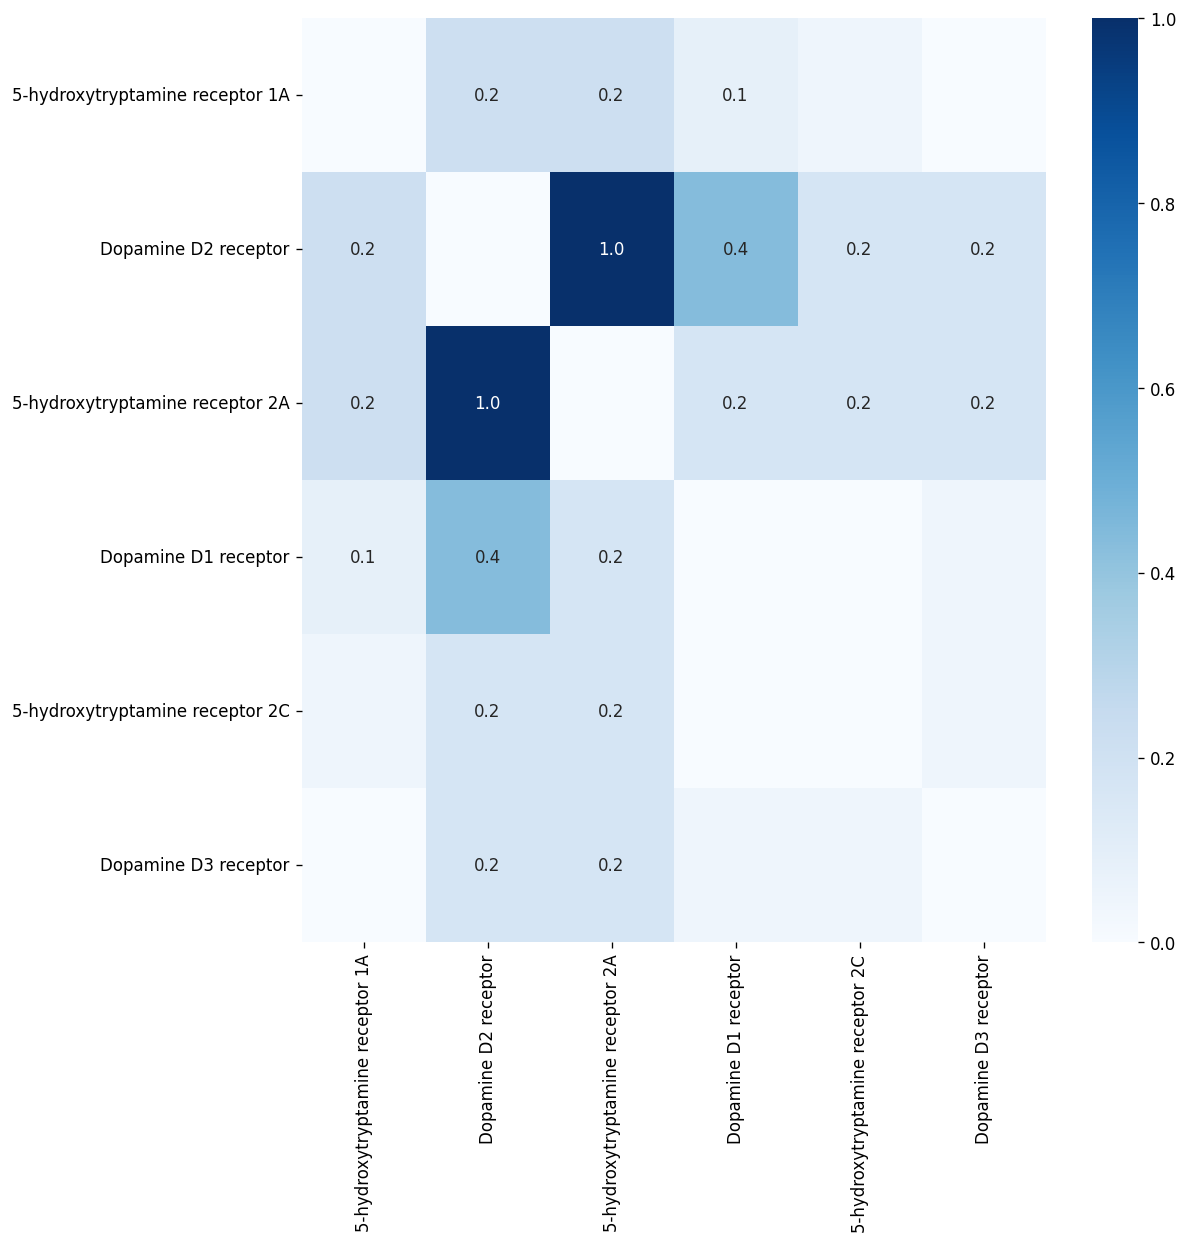

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

disease = "Schizophrenia"
co_occurrence_matrix = disease_matrices[disease]
normalized_matrix = co_occurrence_matrix / co_occurrence_matrix.max().max()

print(merged_df_diseases.loc[
    merged_df_diseases["disease"] == disease,
    "target_names"
].explode().dropna().value_counts().head(10))

threshold = 0.15

# drop rows and columns with all values below the threshold
normalized_matrix = normalized_matrix.loc[
    (normalized_matrix >= threshold).any(axis=1),
    (normalized_matrix >= threshold).any(axis=0)
]

plt.figure(figsize=(10, 10), dpi=120)
ax = sns.heatmap(normalized_matrix, cmap='Blues', annot=True, fmt='.1f')

# if value is 0, don't show its annotation
for text in ax.texts:
    if text.get_text() == '0.0':
        text.set_text('')

**Target selection from co-occurrence matrix:**

In [5]:
def target_selection(disease, threshold):
    """
    Greedy algorithm to iteratively select the best combinations of targets
    for a disease based on the co-occurrence matrix and a threshold.
    """
    co_occurrence_matrix = disease_matrices[disease]
    normalized_matrix = co_occurrence_matrix / co_occurrence_matrix.max().max()

    # drop rows and columns with all zeros
    normalized_matrix = normalized_matrix.loc[
        (normalized_matrix >= threshold).any(axis=1),
        (normalized_matrix >= threshold).any(axis=0)
    ]

    # initialize list of selected targets
    selected_targets = list()

    # iterate until all targets are selected
    while normalized_matrix.shape[0] > 0:
        # get the target with the highest number of co-occurrences
        target = normalized_matrix.sum(axis=1).idxmax()

        # add target to list of selected targets
        selected_targets.append(target)

        # remove target from matrix
        normalized_matrix = normalized_matrix.drop(index=target, columns=target)

    return selected_targets


disease_target_selection = dict()

for disease in ["Alzheimer's", "Schizophrenia", "Parkinson"]:
    co_occurrence_matrix = disease_matrices[disease]
    normalized_matrix = co_occurrence_matrix / co_occurrence_matrix.max().max()

    targets = target_selection(disease, threshold=0.7)

    print(disease, targets)
    disease_target_selection[disease] = targets

Alzheimer's ['Cholinesterase', 'Acetylcholinesterase']
Schizophrenia ['Dopamine D2 receptor', '5-hydroxytryptamine receptor 2A']
Parkinson ['Dopamine D2 receptor', 'Dopamine D3 receptor']


**Create holdout set from selected targets:**

In [6]:
houldout_drugs_smiles = list()
houldout_drugs_names = list()

# for each disease, identify the drugs that target all selected targets
for disease in ["Alzheimer's", "Schizophrenia", "Parkinson"]:
    targets = disease_target_selection[disease]

    print(disease, targets)

    disease_drugs = merged_df_diseases.loc[
        (merged_df_diseases["disease"] == disease),
        ["target_names", "SMILES", "disease"]
    ]

    smiles_targets = disease_drugs.loc[
        disease_drugs["target_names"].apply(
            lambda x: all(target in x for target in targets)
        ),
        ["target_names", "SMILES"]
    ]

    print(smiles_targets.shape)

    houldout_drugs_smiles.extend(smiles_targets["SMILES"].tolist())
    houldout_drugs_names.extend(smiles_targets.index.tolist())

print(len(houldout_drugs_smiles))
list(zip(houldout_drugs_smiles[:10], houldout_drugs_names[:10]))

Alzheimer's ['Cholinesterase', 'Acetylcholinesterase']
(2, 2)
Schizophrenia ['Dopamine D2 receptor', '5-hydroxytryptamine receptor 2A']
(23, 2)
Parkinson ['Dopamine D2 receptor', 'Dopamine D3 receptor']
(9, 2)
34


[('NC1=C2CCCCC2=NC2=CC=CC=C12', 'Tacrine'),
 ('CCN(C)C(=O)OC1=CC=CC(=C1)[C@H](C)N(C)C', 'Rivastigmine'),
 ('ClC1=C(CCN2CCN(CC2)C2=NSC3=CC=CC=C23)C=C2CC(=O)NC2=C1', 'Ziprasidone'),
 ('CN1CCN(CC1)C1=NC2=CC=CC=C2NC2=C1C=C(C)S2', 'Olanzapine'),
 ('CN1CCN(CC1)C1=NC2=CC(Cl)=CC=C2NC2=CC=CC=C12', 'Clozapine'),
 ('CN1CCN(CC1)C1=NC2=CC=CC=C2OC2=C1C=C(Cl)C=C2', 'Loxapine'),
 ('CN(C)CCCN1C2=CC=CC=C2SC2=C1C=C(Cl)C=C2', 'Chlorpromazine'),
 ('CSC1=CC2=C(SC3=CC=CC=C3N2CCC2CCCCN2C)C=C1', 'Thioridazine'),
 ('CC1=C(CCN2CCC(CC2)C2=NOC3=C2C=CC(F)=C3)C(=O)N2CCCCC2=N1', 'Risperidone'),
 ('CN1CCCCC1CCN1C2=C(SC3=C1C=C(C=C3)S(C)=O)C=CC=C2', 'Mesoridazine')]

In [7]:
# Save holdout smiles to file
with open('holdout_set_gcm_multitarget.smiles', 'w') as f:
    f.write('\n'.join(houldout_drugs_smiles))

**Remaining co-occurrence matrix heatmaps:**

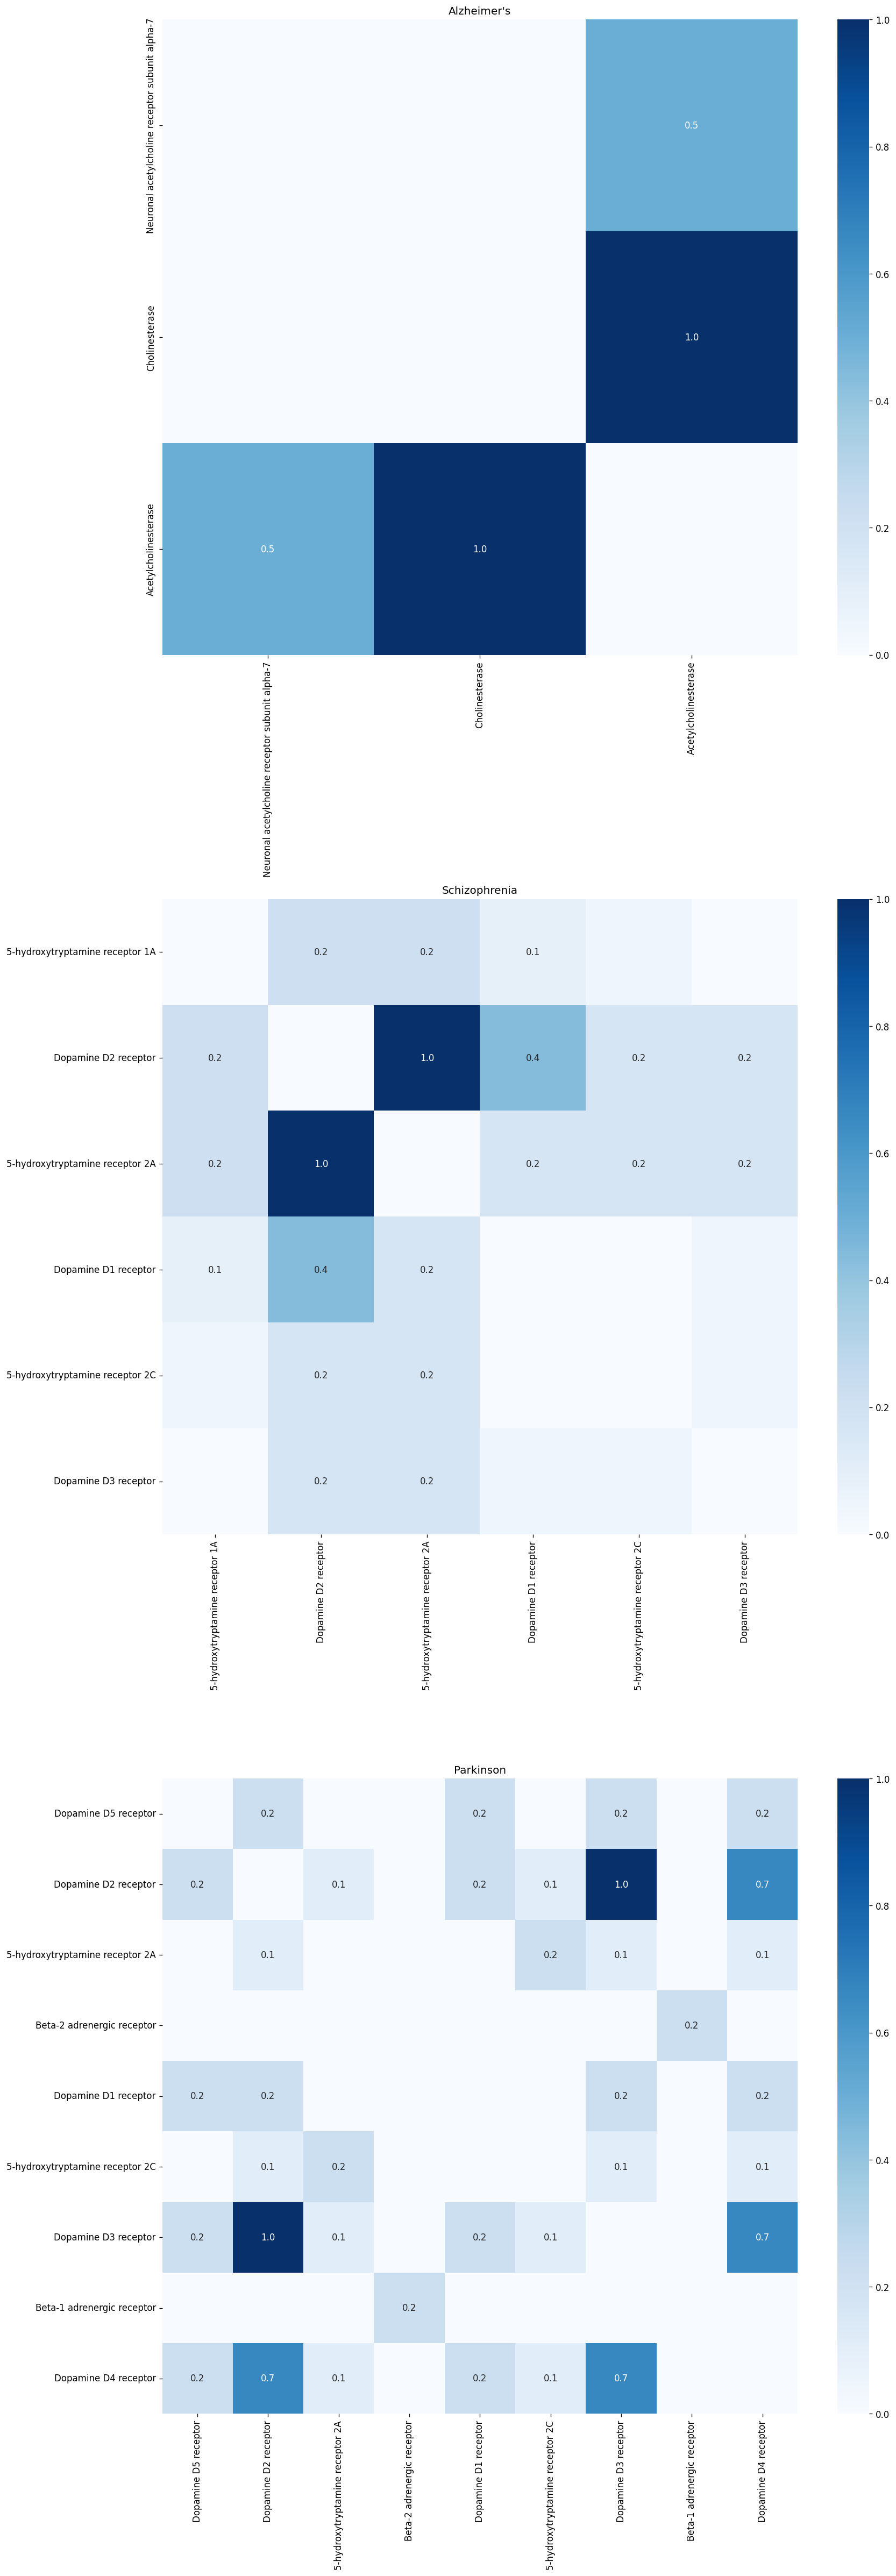

In [12]:
fig, axes = plt.subplots(3, 1, figsize=(15, 40), dpi=120)

for i, disease in enumerate(["Alzheimer's", "Schizophrenia", "Parkinson"]):
    co_occurrence_matrix = disease_matrices[disease]
    normalized_matrix = co_occurrence_matrix / co_occurrence_matrix.max().max()

    threshold = 0.15

    # drop rows and columns with all values below the threshold
    normalized_matrix = normalized_matrix.loc[
        (normalized_matrix >= threshold).any(axis=1),
        (normalized_matrix >= threshold).any(axis=0)
    ]

    # ax = sns.heatmap(normalized_matrix, cmap='Blues', annot=True, fmt='.1f')
    ax = sns.heatmap(normalized_matrix, cmap='Blues', annot=True, fmt='.1f', ax=axes[i])
    ax.set_title(disease)

    # rotate x-axis labels
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

    # if value is 0, don't show its annotation
    for text in ax.texts:
        if text.get_text() == '0.0':
            text.set_text('')

# Add padding between subplots
fig.tight_layout(pad=1.0)

plt.show()